$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Classification with Nonlinear Logistic Regression Using Neural Networks

## Motivation and Setup

Linear function approximator as a neural network.

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/nnlinear.png">

What must we add to do logistic regression?

Just some post-processing.  $\Wv = \betav$

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/nnlinearlogisticregression.png">

Any thoughts on how to do nonlinear logistic regression?

<img src="http://www.cs.colostate.edu/~anderson/cs480/notebooks/nntwolayerlogisticregression.png">


## Derivation

Here we repeat the derivation using $\Wv$ instead of $\beta$.

## Log Likelihood of the Data

$$
  \begin{align*}
    L(\Wv) & = \left ( \prod_{n=1}^N \prod_{k=1}^K P(C=k|\xv_n)^{t_{n,k}} \right ) \\
    \log L(\Wv) & = LL(\Wv) =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log P(C=k|\xv_n)\\
     & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log g_{n,k}
   \end{align*}
$$

## Gradient of the Log Likelihood

$$
      \begin{align*}
        LL(\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k}
      \log g_{n,k}\;\;\;\;\; \text{ where } g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^K \eby{m}}; \\
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} \frac{\partial g_{n,k}}{\partial \Wv_{d,j}}\\    
        \end{align*}
$$

Now let's do some derivatives.

$$
        \begin{align*}
        \frac{\partial g_{n,k}}{\partial \Wv_{d,j}} &=
      \frac{\partial}{\partial \Wv_{d,j}}  \eby{k} \left ( \sum_{m=1}^{K} \eby{m} \right )^{-1} \\
        & = \eby{k} \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} \left (\sum_{m=1}^{K} \eby{m} \right )^{-1} 
         + \eby{k} (-1) \left ( \sum_{m=1}^{K} \eby{m} \right )^{-2} \sum_{m=1}^{K} \eby{m} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}}\\
        & = \frac{\eby{k}}{\sum_{m=1}^{K} \eby{m}} \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}  - \frac{\eby{k}}{\sum_{m=1}^{K} \eby{m}} \sum_{m=1}^{K} \frac{\eby{m}}{\sum_{m=1}^{K} \eby{m}} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}}\\
        & = g_{n,k} \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}  - g_{n,k} \sum_{m=1}^{K} g_{n,m} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}}\\
        & = g_{n,k} \left ( \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}  - \sum_{m=1}^{K} g_{n,m} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}} \right )
      \end{align*}
$$

Substituting for $\frac{\partial g_{n,k}}{\partial \Wv_{d,j}}$ in
$\frac{\partial LL(\Wv)}{\partial \Wv_{d,j}}$ for all $k$:

$$
      \begin{align*}
        \frac{\partial g_{n,k}}{\partial \Wv_{d,j}} &= g_{n,k} \left ( \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}  - \sum_{m=1}^{K} g_{n,m} \frac{\partial  y_{n,m}}{\partial \Wv_{d,j}} \right )\\
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} \frac{\partial g_{n,k}}{\partial \Wv_{d,j}}\\    
        & =  \sum_{n=1}^N \sum_{k=1}^K \frac{t_{n,k}}{g_{n,k}} g_{n,k} \left ( \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} -
        \sum_{m=1}^{K} g_{n,m} \frac{\partial y_{n,m}}{\partial \Wv_{d,j}} \right )\\
        & =   \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \left ( \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} -
        \sum_{m=1}^{K} g_{n,m} \frac{\partial y_{n,m}}{\partial \Wv_{d,j}}\right )\\
        & =   \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} -
        \sum_{k=1}^K t_{n,k} \sum_{m=1}^{K} g_{n,m} \frac{\partial y_{n,m}}{\partial \Wv_{d,j}}\\
        & =   \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \frac{\partial y_{n,k}}{\partial \Wv_{d,j}} -
        \sum_{m=1}^{K} g_{n,m} \frac{\partial y_{n,m}}{\partial \Wv_{d,j}}\\
        & =   \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}\\
      \end{align*}
$$

## Linear Version

General gradient

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

For linear logistic regression, $y_{n,j} = \xv_n^T \Wv_{*,j}$, so $\frac{\partial y_{n,k}}{\partial \Wv_{d,j}}$ exists only when $j=k$, so

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N (t_{n,j} - g_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{d,j}}\\
         & =  \sum_{n=1}^N \left ( t_{n,j} - g_{n,j} \right ) \xv_{d,j}
      \end{align*}
$$

## Nonlinear Version

First the general form again.

$$
      \begin{align*}
        \frac{\partial LL(\Wv)}{\partial \Wv_{d,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} (t_{n,k} - g_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{d,j}}
      \end{align*}
$$

Now $y_{n,j}$ depends on $\Vv$ and $\Wv$, so

$$
      \begin{align*}
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & = \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


But, thank goodness, we have already calculated $\frac{\partial y_{n,k}}{\partial \Vv_{d,m}}$ and 
$\frac{\partial y_{n,k}}{\partial \Wv_{m,k}}$ in our neural network days.  This becomes more clear when we compare above with the derivatives of
mean squared error with respect to weights for neural networks for regression problems.

$$
      \begin{align*}
      E &= \frac{1}{NK}  \frac{1}{2} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k})^2\\
      \frac{\partial E}{\partial \Vv_{d,m}} & = - \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N \sum_{k=1}^K (t_{n,k} - y_{n,k}) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
      \frac{\partial E}{\partial \Wv_{m,j}} & = - \frac{1}{NK}  \sum_{n=1}^N  (t_{n,j} - y_{n,j}) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$

Compare to gradients for likelihood

$$
      \begin{align*}
        LL(\Vv,\Wv) & =  \sum_{n=1}^N \sum_{k=1}^K t_{n,k} \log
        g_{n,k} \text{ where }  g_{n,k}  =  
               \frac{\eby{k}}{\sum_{m=1}^{K} \eby{m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Vv_{d,m}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Vv_{d,m}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N \sum_{k=1}^{K} \left ( t_{n,k} - g_{n,k} \right ) \frac{\partial y_{n,k}}{\partial \Wv_{m,j}}\\
        \frac{\partial LL(\Vv,\Wv)}{\partial \Wv_{m,j}} & =  \sum_{n=1}^N  \left ( t_{n,j} - g_{n,j} \right ) \frac{\partial y_{n,j}}{\partial \Wv_{m,j}}
      \end{align*}
$$


So, our previously derived matrix expressions for neural networks can
be used if we modify the output calculation.  Here are the expressions
we used for minimizing mean squared error:

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        E &= \frac{1}{NK} \frac{1}{2} \sum (\Tv - \Yv)^2\\
        \grad_\Vv E &=  - \frac{1}{NK}  \tilde{\Xv}^T \left ( (\Tv - \Yv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv E &=  - \frac{1}{NK} \tilde{\Zv}^T (\Tv - \Yv)
      \end{align*}
$$


Here are the changes needed for nonlinear logistic regression. $\Tiv$
is indicator variables for  $\Tv$  

$$
      \begin{align*}
        \Zv &= h(\tilde{\Xv} \Vv)\\
        \Yv &= \tilde{\Zv} \Wv\\
        \Fv &= e^{\Yv}\\
        \Sv &= \Fv \ones{K}\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ sum across columns}\\
        \Gv &= \Fv / \left [ \Sv, \Sv,\ldots,\Sv \right ] \;\;\; \Sv \text{ are column vectors }\\
        LL &=  \sum \Tiv \log \Gv\\
        \grad_\Vv LL &=    \tilde{\Xv}^T \left ( (\Tiv - \Gv) \hat{\Wv}^T \cdot  (1-\Zv^2) \right )\\
        \grad_\Wv LL &=   \tilde{\Zv}^T (\Tiv - \Gv)
      \end{align*}
$$

## Examples

## Two-Dimensional Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

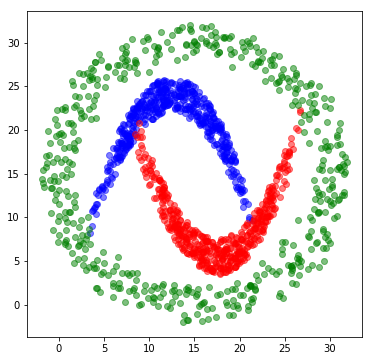

In [2]:
n = 500
x1 = np.linspace(5,20,n) + np.random.uniform(-2,2,n)
y1 = ((20-12.5)**2-(x1-12.5)**2) / (20-12.5)**2 * 10 + 14 + np.random.uniform(-2,2,n)
x2 = np.linspace(10,25,n) + np.random.uniform(-2,2,n)
y2 = ((x2-17.5)**2) / (25-17.5)**2 * 10 + 5.5 + np.random.uniform(-2,2,n)
angles = np.linspace(0,2*np.pi,n)
x3 = np.cos(angles) * 15 + 15 + np.random.uniform(-2,2,n)
y3 = np.sin(angles) * 15 + 15 + np.random.uniform(-2,2,n)
X =  np.vstack((np.hstack((x1,x2,x3)), np.hstack((y1,y2,y3)))).T
T = np.repeat(range(1,4),n).reshape((-1,1))
colors = ['blue','red','green']
plt.figure(figsize=(6,6))
for c in range(1,4):
    mask = (T == c).flatten()
    plt.plot(X[mask,0],X[mask,1],'o',markersize=6, alpha=0.5, color=colors[c-1])

Let's try to classify this data with a 5 hidden unit neural network with nonlinear logistic regression.  In Python, do this by defining a new class *NeuralNetClassifier* it is easy to create a new class for using a neural network
as a classifier by making a subclass *NeuralNetworkClassifier* of the
*NeuralNetwork* and make the required changes.  The changes will be in *objectiveF* and *gradF* functions local to the *train* method, and in the *use* method.

In [4]:
!wget http://www.cs.colostate.edu/~anderson/cs480/notebooks/nn2.tar
!mv nn2.tar.1 nn2.tar   # in case I already have a file named nn2.tar in this directory
!tar xvf nn2.tar

--2017-03-09 17:08:31--  http://www.cs.colostate.edu/~anderson/cs480/notebooks/nn2.tar
Resolving www.cs.colostate.edu (www.cs.colostate.edu)... 129.82.45.114
Connecting to www.cs.colostate.edu (www.cs.colostate.edu)|129.82.45.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51200 (50K) [application/x-tar]
Saving to: ‘nn2.tar.1’

nn2.tar.1           100%[===================>]  50.00K  --.-KB/s    in 0.003s  

2017-03-09 17:08:31 (19.4 MB/s) - ‘nn2.tar.1’ saved [51200/51200]

neuralnetworks.py
mlutils.py
scaledconjugategradient.py


In [5]:
cat neuralnetworks.py


import numpy as np
import scaledconjugategradient as scg
import mlutils as ml  # for draw()
from copy import copy
import sys  # for sys.float_info.epsilon
import pdb

######################################################################
### class NeuralNetwork
######################################################################

class NeuralNetwork:

    def __init__(self, ni,nhs,no):        
        if nhs == 0 or nhs == [0] or nhs is None or nhs == [None]:
            nhs = None
        else:
            try:
                nihs = [ni] + list(nhs)
            except:
                nihs = [ni] + [nhs]
                nhs = [nhs]
        if nhs is not None:
            self.Vs = [(np.random.uniform(-1,1,size=(1+nihs[i],nihs[i+1])) / np.sqrt(nihs[i]))  for i in range(len(nihs)-1)]
            self.W = np.zeros((1+nhs[-1],no))
            # self.W = (np.random.uniform(-1,1,size=(1+nhs[-1],no)) / np.sqrt(nhs[-1]))
        else:
            self.Vs = None
            self.W = np.zer

SCG: Iteration 100 fValue Eval 0.0209511376248 Scale 1e-15
SCG: Iteration 200 fValue Eval 0.00918331852331 Scale 1e-15
SCG: Iteration 300 fValue Eval 0.00820056571067 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.00757178112712 Scale 1e-15
SCG: Iteration 500 fValue Eval 0.00708538473938 Scale 1e-15
SCG: Iteration 600 fValue Eval 0.00674040704149 Scale 1e-15
SCG: Iteration 700 fValue Eval 0.00648692685763 Scale 1e-15
SCG: Iteration 800 fValue Eval 0.00631823508481 Scale 1e-15
SCG: Iteration 900 fValue Eval 0.00616581293097 Scale 1e-15
SCG: Iteration 1000 fValue Eval 0.00604705082107 Scale 1e-15
3.84832800145 0.722948695341 2066.11570248


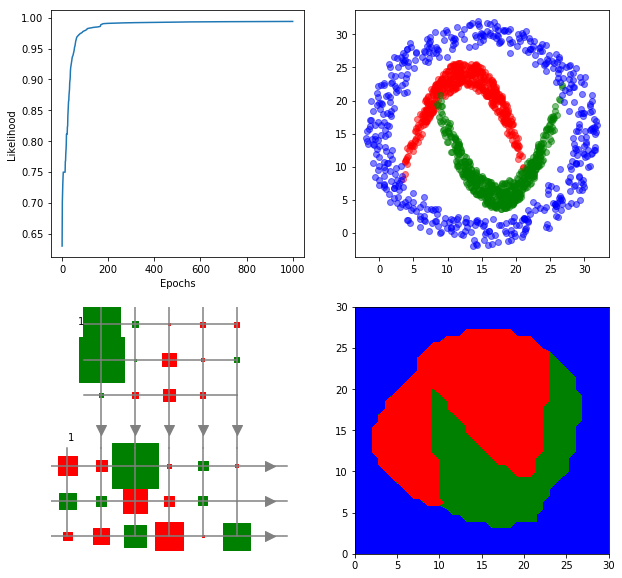

In [4]:
import neuralnetworks as nn
import mpl_toolkits.mplot3d as plt3
from matplotlib import cm

## if you edit neuralnetwork.py, force ipython to reload it by doing this.
# from imp import reload
# reload(nn)

nHidden = 5
nnet = nn.NeuralNetworkClassifier(2,nHidden,3) # 3 classes, will actually make 2-unit output layer
nnet.train(X,T,  nIterations=1000, verbose=True)

xs = np.linspace(0,30,40)
x,y = np.meshgrid(xs,xs)
Xtest = np.vstack((x.flat,y.flat)).T
Ytest = nnet.use(Xtest)
predTest,probs,_ = nnet.use(Xtest,allOutputs=True)  #discard hidden unit outputs

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel("Epochs")
plt.ylabel("Likelihood")

plt.subplot(2,2,3)
nnet.draw()

colors = ['red','green','blue']
plt.subplot(2,2,2)

for c in range(1,4):
    mask = (T == c).flatten()
    plt.plot(X[mask,0],X[mask,1],'o',markersize=6, alpha=0.5, color=colors[c-1])

plt.subplot(2,2,4)
plt.contourf(Xtest[:,0].reshape((40,40)),Xtest[:,1].reshape((40,40)), predTest.reshape((40,40)),
             levels = [0.5,1.99,2.01,3.5], #    levels=(0.5,1.5,2.5,3.5),
             colors=('red','green','blue'));

In [5]:
from matplotlib.colors import LightSource

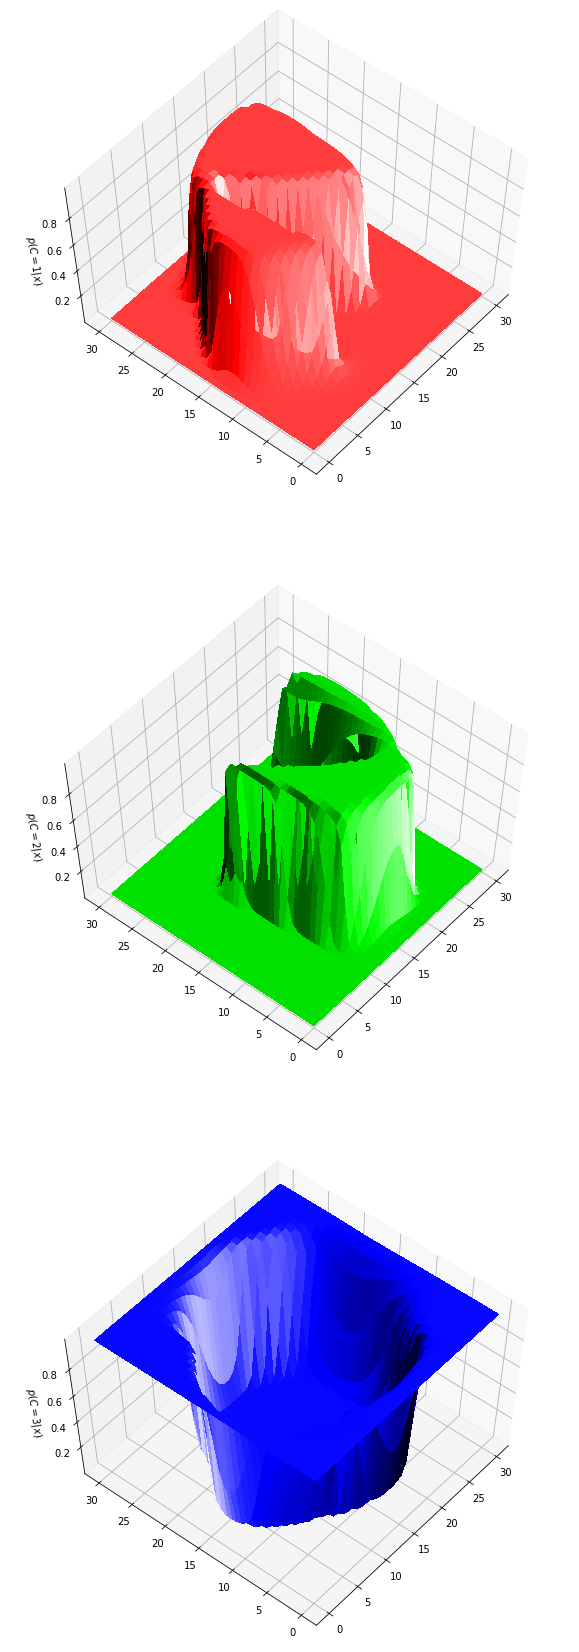

In [6]:
fig = plt.figure(figsize=(10,30))
ls = LightSource(azdeg=30, altdeg=60)
white = np.ones((x.shape[0], x.shape[1], 3))
red = white * np.array([1,0,0])
green = white * np.array([0,1,0])
blue = white * np.array([0,0,1])
colors = [red, green, blue]
#colors = ['red','green','blue']

for c in range(3):
    ax = fig.add_subplot(3,1,c+1,projection='3d')
    ax.view_init(azim = 180+40,elev = 60)
    Z = probs[:, c].reshape(x.shape)
    #ax.plot_surface(x,y,Z,
    #rstride=1,cstride=1,linewidth=0,antialiased=False,
    #                color=colors[c],alpha=1)
    rgb = ls.shade_rgb(colors[c], Z, vert_exag=0.1)
    #rgb = ls.shade(Z, plt.cm.gray)
    ax.plot_surface(x,y,Z,
                    rstride=1,cstride=1,linewidth=0, antialiased=False,
                    shade=False, facecolors=rgb)
    ax.set_zlabel(r"$p(C="+str(c+1)+"|x)$")

How would you plot the outputs of the hidden units?

Let's repeat the experiment with classifying human activity data (accelerometer data), but now use our *NeuralNetworkClassifier* class to do nonlinear logistic regression.  This time we will retrieve and load *accelerometers.npy*, a file containing a *numpy* array stored in its binary format.

In [7]:
!wget http://www.cs.colostate.edu/~anderson/cs480/notebooks/accelerometers.npy
!mv accelerometers.npy.1 accelerometers.npy
data = np.load('accelerometers.npy')

--2017-03-21 13:49:16--  http://www.cs.colostate.edu/~anderson/cs480/notebooks/accelerometers.npy
Resolving www.cs.colostate.edu (www.cs.colostate.edu)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘www.cs.colostate.edu’
mv: cannot stat 'accelerometers.npy.1': No such file or directory


In [8]:
data.shape

(225006, 4)

In [9]:
data[0,:]

array([ 1.        , -0.87313405, -0.08552787, -0.29504612])

In [10]:
X = data[:,1:]
T = data[:,0:1]
X.shape, T.shape

((225006, 3), (225006, 1))

In [11]:
import mlutils as ml # for ml.paritition

In [12]:
Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(0.8,0.2),classification=True) #stratified partitioning (by class)

In [13]:
Xtrain.shape,Ttrain.shape,Xtest.shape,Ttest.shape

((180006, 3), (180006, 1), (45000, 3), (45000, 1))

In [14]:
np.unique(Ttrain, return_counts=True)

(array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 array([18002, 18000, 18000, 18000, 18000, 18002, 18000, 18000, 18002, 18000]))

In [15]:
%precision 5
values,counts = np.unique(Ttrain, return_counts=True)
counts / Ttrain.shape[0]

array([ 0.10001,  0.1    ,  0.1    ,  0.1    ,  0.1    ,  0.10001,
        0.1    ,  0.1    ,  0.10001,  0.1    ])

In [16]:
values,counts = np.unique(Ttest, return_counts=True)
counts / Ttest.shape[0]

array([ 0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1])

SCG: Iteration 5 fValue Eval 0.213197424929 Scale 3.2e-05
SCG: Iteration 10 fValue Eval 0.19327563838 Scale 0.000512
SCG: Iteration 15 fValue Eval 0.164094359193 Scale 1.6e-05
SCG: Iteration 20 fValue Eval 0.152693223531 Scale 5e-07
SCG: Iteration 25 fValue Eval 0.147388691719 Scale 1.5625e-08
SCG: Iteration 30 fValue Eval 0.14355361434 Scale 4.8828125e-10
SCG: Iteration 35 fValue Eval 0.140991078094 Scale 1.52587890625e-11
SCG: Iteration 40 fValue Eval 0.139639523339 Scale 4.76837158203125e-13
SCG: Iteration 45 fValue Eval 0.138488147927 Scale 1.4901161193847656e-14
SCG: Iteration 50 fValue Eval 0.137446656468 Scale 1e-15


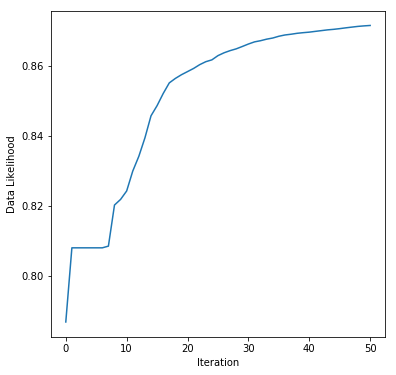

In [17]:
nnet = nn.NeuralNetworkClassifier(3,10,10) # 10 classes
nnet.train(Xtrain,Ttrain,nIterations=50,errorPrecision=1.e-8, verbose=True)

plt.rcParams['figure.figsize'] = (6,6)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

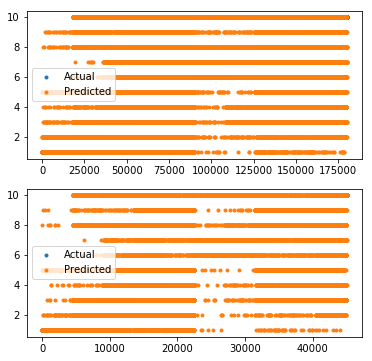

In [18]:
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
plt.subplot(2,1,1)
plt.plot(np.hstack((Ttrain,Ptrain)), '.')
plt.legend(('Actual','Predicted'))
plt.subplot(2,1,2)
plt.plot(np.hstack((Ttest,Ptest)), '.')
plt.legend(('Actual','Predicted'));


In [19]:
cm = ml.confusionMatrix(Ttest,Ptest,np.unique(Ttest))
cm

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 96.3  1.1  0.2  0.2  2.0  0    0    0.2  0.1  0     (4500 / 4500)
 2 | 16.3 56.1 16.8  0.5  2.9  0.1  0.0  2.6  1.0  3.6   (4500 / 4500)
 3 |  2.7  7.1 66.7  3.8  4.5  2.7  1.8  3.2  0.6  6.9   (4500 / 4500)
 4 |  3.5  5.5 29.7 12.1 11.6 11.1  6.1  5.9  6.2  8.3   (4500 / 4500)
 5 |  4.9  9.2 12.6  4.2 41.5  1.4  2.1  7.8 12.9  3.4   (4500 / 4500)
 6 |  0.1  0.1  0.2  0.2  0.1 78.6 17.3  0.5  0.1  2.8   (4500 / 4500)
 7 |  0    0.2  0.7  0.6  0.1 40.6 48.6  2.4  0.2  6.6   (4500 / 4500)
 8 |  0.6  0.7  8.3  3.8 10.9  1.7  3.6 32.7 33.5  4.3   (4500 / 4500)
 9 |  0.3  0.7  5.0  3.5 12.4  1.8  2.6 27.2 43.8  2.6   (4500 / 4500)
10 |  0.2  5.2 15.4  7.1  3.1 17.4 21.6  7.1  4.8 18.1   (4500 / 4500)


array([[  9.63111e-01,   1.06667e-02,   2.00000e-03,   1.55556e-03,
          2.02222e-02,   0.00000e+00,   0.00000e+00,   1.55556e-03,
          8.88889e-04,   0.00000e+00,   4.50000e+03,   4.50000e+03],
       [  1.63333e-01,   5.61111e-01,   1.67778e-01,   4.66667e-03,
          2.93333e-02,   1.11111e-03,   4.44444e-04,   2.62222e-02,
          1.04444e-02,   3.55556e-02,   4.50000e+03,   4.50000e+03],
       [  2.73333e-02,   7.08889e-02,   6.66667e-01,   3.77778e-02,
          4.48889e-02,   2.73333e-02,   1.82222e-02,   3.17778e-02,
          6.44444e-03,   6.86667e-02,   4.50000e+03,   4.50000e+03],
       [  3.51111e-02,   5.51111e-02,   2.96667e-01,   1.21111e-01,
          1.16222e-01,   1.11111e-01,   6.08889e-02,   5.86667e-02,
          6.20000e-02,   8.31111e-02,   4.50000e+03,   4.50000e+03],
       [  4.93333e-02,   9.24444e-02,   1.25556e-01,   4.15556e-02,
          4.15111e-01,   1.37778e-02,   2.08889e-02,   7.84444e-02,
          1.29111e-01,   3.37778e-02,   4.50

In [20]:
ml.printConfusionMatrix(cm,np.unique(Ttest))

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 96.3  1.1  0.2  0.2  2.0  0    0    0.2  0.1  0     (4500 / 4500)
 2 | 16.3 56.1 16.8  0.5  2.9  0.1  0.0  2.6  1.0  3.6   (4500 / 4500)
 3 |  2.7  7.1 66.7  3.8  4.5  2.7  1.8  3.2  0.6  6.9   (4500 / 4500)
 4 |  3.5  5.5 29.7 12.1 11.6 11.1  6.1  5.9  6.2  8.3   (4500 / 4500)
 5 |  4.9  9.2 12.6  4.2 41.5  1.4  2.1  7.8 12.9  3.4   (4500 / 4500)
 6 |  0.1  0.1  0.2  0.2  0.1 78.6 17.3  0.5  0.1  2.8   (4500 / 4500)
 7 |  0    0.2  0.7  0.6  0.1 40.6 48.6  2.4  0.2  6.6   (4500 / 4500)
 8 |  0.6  0.7  8.3  3.8 10.9  1.7  3.6 32.7 33.5  4.3   (4500 / 4500)
 9 |  0.3  0.7  5.0  3.5 12.4  1.8  2.6 27.2 43.8  2.6   (4500 / 4500)
10 |  0.2  5.2 15.4  7.1  3.1 17.4 21.6  7.1  4.8 18.1   (4500 / 4500)


Try training for more iterations.

In [21]:
nnet = nn.NeuralNetworkClassifier(3,20,10) # 10 classes
nnet.train(Xtrain,Ttrain,nIterations=500,errorPrecision=1.e-8, verbose=True)
print('Trained for',nnet.getNumberOfIterations(),'iterations')

SCG: Iteration 50 fValue Eval 0.130644009649 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.125384196172 Scale 1e-15
SCG: Iteration 150 fValue Eval 0.123227543984 Scale 1e-15
SCG: Iteration 200 fValue Eval 0.122008512712 Scale 1e-15
SCG: Iteration 250 fValue Eval 0.121221894126 Scale 1e-15
SCG: Iteration 300 fValue Eval 0.120788550999 Scale 1e-15
SCG: Iteration 350 fValue Eval 0.120518972635 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.120341188556 Scale 1e-15
SCG: Iteration 450 fValue Eval 0.120233316175 Scale 1e-15
SCG: Iteration 500 fValue Eval 0.120177956411 Scale 1e-15
Trained for 500 iterations


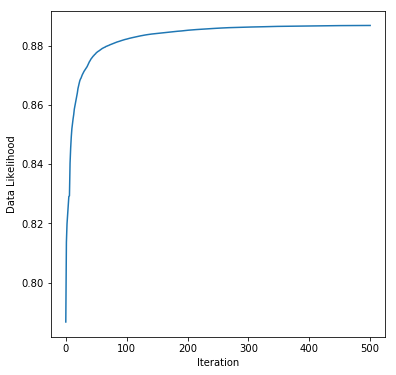

In [22]:
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood');

Percent Correct: Training 55.4648178394 Testing 55.5933333333

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 97.1  0.4  1.1  0.5  0.7  0    0    0.1  0.0  0     (4500 / 4500)
 2 |  4.2 79.4  9.3  0.5  3.2  0.0  0.0  2.0  0.3  1.1   (4500 / 4500)
 3 |  1.3  3.5 73.4  2.4  6.2  1.9  2.8  1.7  0.4  6.4   (4500 / 4500)
 4 |  1.6  5.6 28.4 13.4 12.0  9.6  5.7  6.4  4.1 13.4   (4500 / 4500)
 5 |  1.1  6.2 13.2  4.4 51.1  0.7  1.7  8.2 10.0  3.5   (4500 / 4500)
 6 |  0    0.1  0.4  0.2  0.2 73.6 20.3  0.4  0.1  4.9   (4500 / 4500)
 7 |  0    0.2  0.5  0.3  0.1 29.4 61.3  0.9  0.3  6.9   (4500 / 4500)
 8 |  0.1  2.1  7.0  3.3 11.4  1.2  4.0 32.4 32.6  5.8   (4500 / 4500)
 9 |  0.0  1.2  4.9  3.1 11.4  0.9  2.7 23.9 47.8  3.9   (4500 / 4500)
10 |  0.0  4.0 15.6  6.0  3.6 15.4 18.5  6.6  3.9 26.4   (4500 / 4500)
       1    2    3    4    5    6    7    8    9   10
    --------------------------------------------------

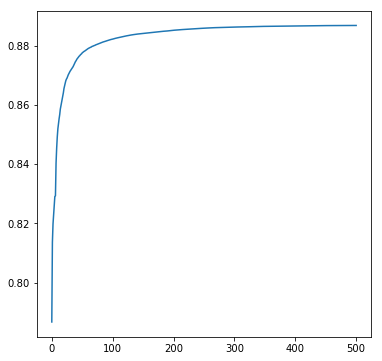

In [23]:
classes = np.unique(Ttest)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
print('Percent Correct: Training',100*np.sum(Ptrain==Ttrain)/len(Ttrain), 'Testing',100*np.sum(Ptest==Ttest)/len(Ttest))
print()
ml.printConfusionMatrix( ml.confusionMatrix(Ttest,Ptest,classes), classes )
print('1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs')
plt.plot(np.exp(-nnet.getErrorTrace()));

0.616177194745 8.2180055212e-06 148.720999405


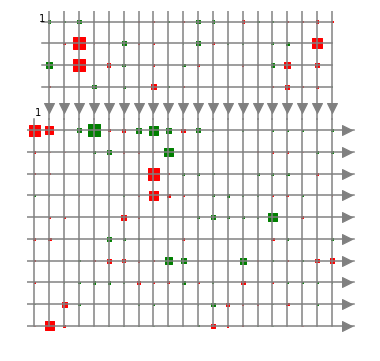

In [24]:
nnet.draw()

In [25]:
import scipy.signal as sig

def cwt(eeg,Fs,freqs,width,channelNames=None,graphics=False):
    if freqs.min() == 0:
        print('cwt: Frequencies must be greater than 0.')
        return None,None
    nChannels,nSamples = eeg.shape
    if not channelNames and graphics:
        channelNames = ['Channel {:2d}'.format(i) for i in range(nChannels)]

    nFreqs = len(freqs)
    tfrep = np.zeros((nChannels, nFreqs, nSamples))
    tfrepPhase = np.zeros((nChannels, nFreqs, nSamples))

    for ch in range(nChannels):
        print('channel',ch,' freq ',end='')
        for freqi in range(nFreqs):
            print(freqs[freqi],' ',end='')
            mag,phase = energyvec(freqs[freqi],eeg[ch,:],Fs,width)
            tfrepPhase[ch,freqi,:] = phase
            tfrep[ch,freqi,:] = mag
        print()

    return tfrep, tfrepPhase

def morletLength(Fs,f,width):
  ''' len = morletLength(Fs,f,width) '''
  dt = 1.0/Fs
  sf = f/width
  st = 1.0/(2*np.pi*sf)
  return int((3.5*st - -3.5*st)/dt)

def energyvec(f,s,Fs,width):
  '''
  function [y,phase] <- energyvec(f,s,Fs,width)
  function y <- energyvec(f,s,Fs,width)

  Return a vector containing the energy as a
  function of time for frequency f. The energy
  is calculated using Morlet''s wavelets.
  s : signal
  Fs: sampling frequency
  width : width of Morlet wavelet (><- 5 suggested).
  '''

  dt = 1.0/Fs
  sf = f/float(width)
  st = 1.0/(2*np.pi*sf)

  t = np.arange(-3.5*st,3.5*st,step=dt)
  m = morlet(f,t,width)
  # yconv = np.convolve(s,m,mode="same")
  yconv = sig.fftconvolve(s,m,mode='same')

  lengthMorlet = len(m)
  firsthalf = int(lengthMorlet/2.0 + 0.5)
  secondhalf = lengthMorlet - firsthalf

  padtotal = len(s) - len(yconv)
  padfront = int(padtotal/2.0 + 0.5)
  padback = padtotal - padfront
  yconvNoBoundary = yconv
  y = np.abs(yconvNoBoundary)**2
  phase = np.angle(yconvNoBoundary,deg=True)
  return y,phase

######################################################################
      
def morlet(f,t,width):
    '''
    function y <- morlet(f,t,width)
    Morlet''s wavelet for frequency f and time t.
    The wavelet will be normalized so the total energy is 1.
    width defines the width of the wavelet.
    A value ><- 5 is suggested.

    Ref: Tallon-Baudry et al., J. Neurosci. 15, 722-734 (1997), page 724

    Ole Jensen, August 1998
    '''
    sf = f/float(width)
    st = 1.0/(2*np.pi*sf)
    A = 1.0/np.sqrt(st*np.sqrt(2*np.pi))
    y = A*np.exp(-t**2/(2*st**2)) * np.exp(1j*2*np.pi*f*t)
    return y

In [26]:
import time
width = 75 * 1
maxFreq = 20
freqs = np.arange(0.5,maxFreq,0.5) # makes same freqs used in stft above
start = time.time()
tfrep,tfrepPhase = cwt(data[:,1:].T, 75, freqs, width)
print('CWT time: {} seconds'.format(time.time() - start))

channel 0  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 1  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
channel 2  freq 0.5  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0  5.5  6.0  6.5  7.0  7.5  8.0  8.5  9.0  9.5  10.0  10.5  11.0  11.5  12.0  12.5  13.0  13.5  14.0  14.5  15.0  15.5  16.0  16.5  17.0  17.5  18.0  18.5  19.0  19.5  
CWT time: 4.156572341918945 seconds


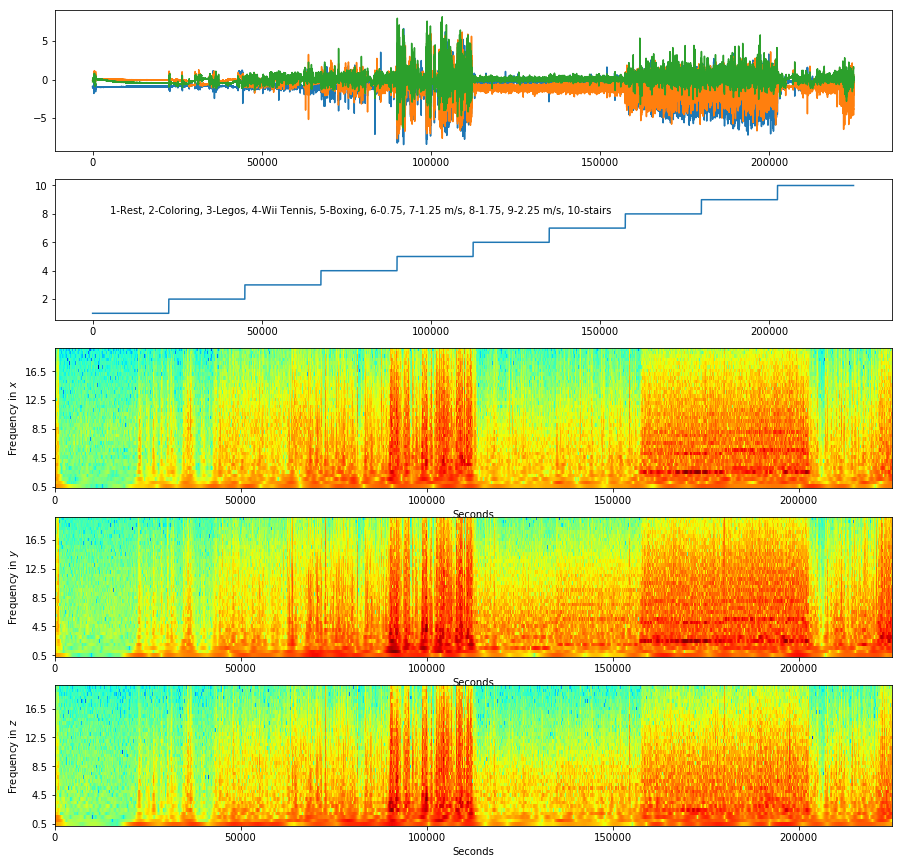

In [27]:
plt.figure(figsize=(15,15))
plt.subplot(5,1,1)
plt.plot(data[:,1:])
plt.axis('tight')

plt.subplot(5,1,2)
plt.plot(data[:,0])
plt.text(5000,8,'1-Rest, 2-Coloring, 3-Legos, 4-Wii Tennis, 5-Boxing, 6-0.75, 7-1.25 m/s, 8-1.75, 9-2.25 m/s, 10-stairs')
plt.axis('tight')

nSensors = data.shape[1] - 1
for i in range(nSensors):
    plt.subplot(5,1,i+3)
    plt.imshow(np.log(tfrep[i,:,:]), 
               interpolation='nearest',origin='lower',
               cmap=plt.cm.jet) #plt.cm.Reds)
    plt.xlabel('Seconds')
    plt.ylabel('Frequency in ' + ('$x$','$y$','$z$')[i])
    tickstep = round(len(freqs) / 5)
    plt.yticks(np.arange(len(freqs))[::tickstep],
                   [str(i) for i in freqs[::tickstep]])
    plt.axis('auto')
    plt.axis('tight')

In [28]:
tfrep.shape

(3, 39, 225006)

In [29]:
X = tfrep.reshape((3*39,-1)).T
X.shape, T.shape, len(np.unique(T))

((225006, 117), (225006, 1), 10)

In [30]:
Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(0.8,0.2),classification=True) #stratified partitioning (by class)

In [31]:
nnet = nn.NeuralNetworkClassifier(X.shape[1],20,10)  #10 classes 
nnet.train(Xtrain,Ttrain,nIterations = 100,errorPrecision=1.e-8, verbose=True)

SCG: Iteration 10 fValue Eval 0.101821009 Scale 1.953125e-09
SCG: Iteration 20 fValue Eval 0.0773607463387 Scale 1.9073486328125e-12
SCG: Iteration 30 fValue Eval 0.055819217314 Scale 1.862645149230957e-15
SCG: Iteration 40 fValue Eval 0.0432814348847 Scale 1e-15
SCG: Iteration 50 fValue Eval 0.0368384188536 Scale 1e-15
SCG: Iteration 60 fValue Eval 0.0312921259619 Scale 1e-15
SCG: Iteration 70 fValue Eval 0.0278106627712 Scale 1e-15
SCG: Iteration 80 fValue Eval 0.0238605273864 Scale 1e-15
SCG: Iteration 90 fValue Eval 0.0223462053802 Scale 1e-15
SCG: Iteration 100 fValue Eval 0.0189000873937 Scale 1e-15


NeuralNetwork(117, [20], 10)
   Network was trained for 100 iterations. Final error is 0.018900087393657148.

Percent Correct: Training 93.8685377154 Testing 93.7955555556

       1    2    3    4    5    6    7    8    9   10
    ------------------------------------------------------------
 1 | 86.1 13.9  0    0    0    0    0    0    0    0     (4500 / 4500)
 2 | 14.3 79.7  6.0  0    0    0    0    0    0    0     (4500 / 4500)
 3 |  0    3.3 93.9  0.8  0.5  0    0    0    0    1.5   (4500 / 4500)
 4 |  0    0    0  100.0  0    0    0    0    0    0     (4500 / 4500)
 5 |  0    0    0    0.0100.0  0    0    0    0    0     (4500 / 4500)
 6 |  0    2.6  0    0    0   95.8  0.7  0    0    0.9   (4500 / 4500)
 7 |  0.7  0    0    0    0    3.0 96.1  0.0  0    0.1   (4500 / 4500)
 8 |  0    0    0    0    0    0    0  100.0  0    0     (4500 / 4500)
 9 |  0    0    0    0    0    0    0    0.0100.0  0     (4500 / 4500)
10 |  0    5.2  5.4  0    0    2.8  0    0.0  0   86.4   (4500 / 4500)
       1    2    3    4    5    6    7    8    9   10
    --------------------------------------------------

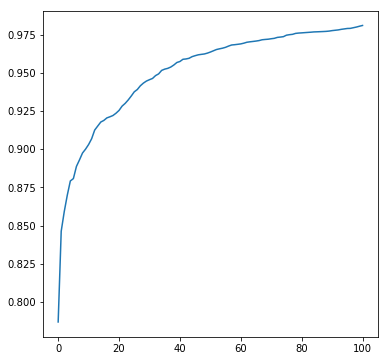

In [32]:
classes = np.unique(Ttest)
Ptrain,Prtrain,_ = nnet.use(Xtrain,allOutputs=True)
Ptest,Prtest,_ = nnet.use(Xtest,allOutputs=True)
print('Percent Correct: Training',100*np.sum(Ptrain==Ttrain)/len(Ttrain), 'Testing',100*np.sum(Ptest==Ttest)/len(Ttest))
print()
ml.printConfusionMatrix( ml.confusionMatrix(Ttest,Ptest,classes), classes )
print('1-Rest 2-Coloring 3-Legos 4-Wii Tennis 5-Wii Boxing 6-0.75m/s 7-1.25m/s 8-1.75m/s, 9-2.25m/s 10-Stairs')
plt.plot(np.exp(-nnet.getErrorTrace()));

1.08883907331 2.3679858934e-08 15.2587890625


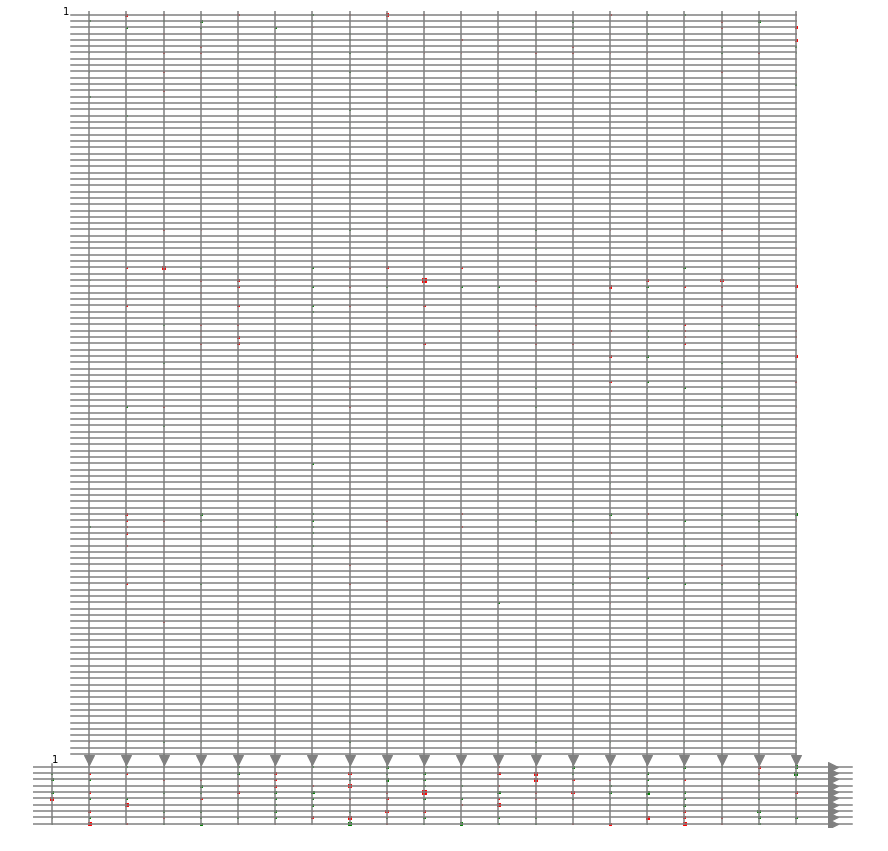

In [33]:
plt.figure(figsize=(15,15))
nnet.draw()

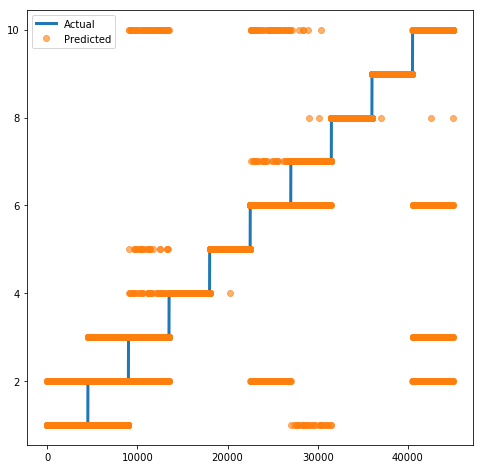

In [34]:
plt.figure(figsize=(8,8))
plt.plot(Ttest,lw=3)
plt.plot(Ptest,'o',alpha=0.6)
plt.legend(('Actual','Predicted'),loc='best');